<a href="https://colab.research.google.com/github/Tejaswi-kashyap-006/Tumor_classification/blob/main/Tumor_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df = pd.read_csv('/content/cancer_classification.csv')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


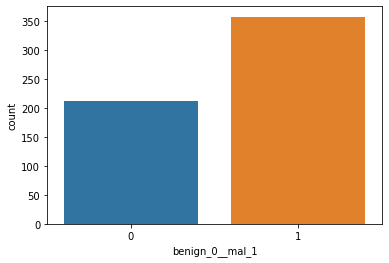

In [ ]:
sns.countplot(x='benign_0__mal_1', data =df)

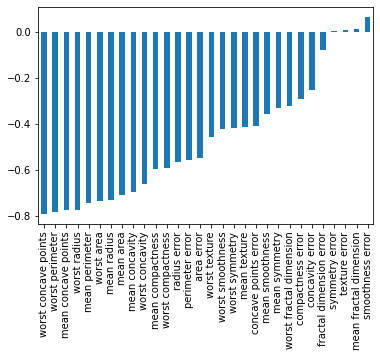

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30, activation ='relu'))

model.add(Dense(15, activation ='relu'))

model.add(Dense(1,activation ='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6812 - val_loss: 0.6660
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6506 - val_loss: 0.6365
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6180 - val_loss: 0.5980
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5723 - val_loss: 0.5421
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5200 - val_loss: 0.4865
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4652 - val_loss: 0.4320
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4143 - val_loss: 0.3816
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3710 - val_loss: 0.3389
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3349 - val_loss: 0.3043
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3056 - val_loss: 0.2763
Epoch 11

In [ ]:
losses =pd.DataFrame(model.history.history)

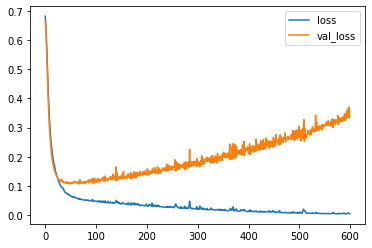

In [ ]:
losses.plot()

In [ ]:
model = Sequential()

model.add(Dense(30, activation ='relu'))

model.add(Dense(15, activation ='relu'))

model.add(Dense(1,activation ='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6939 - val_loss: 0.6721
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6535 - val_loss: 0.6330
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6140 - val_loss: 0.5923
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5726 - val_loss: 0.5503
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5275 - val_loss: 0.5023
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4824 - val_loss: 0.4551
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4352 - val_loss: 0.4063
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3910 - val_loss: 0.3615
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3491 - val_loss: 0.3223
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3130 - val_loss: 0.2874
Epoch 11

In [ ]:
model_loss =pd.DataFrame(model.history.history)


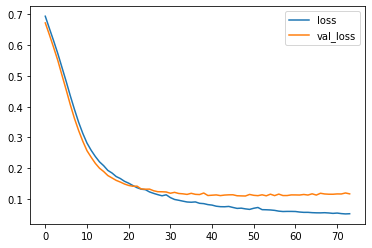

In [ ]:
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation ='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6981 - val_loss: 0.6901
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6848 - val_loss: 0.6817
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6750 - val_loss: 0.6646
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6699 - val_loss: 0.6475
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6421 - val_loss: 0.6327
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6351 - val_loss: 0.6177
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6354 - val_loss: 0.6063
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6125 - val_loss: 0.5939
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5982 - val_loss: 0.5735
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5924 - val_loss: 0.5556
Epoch 11

In [ ]:
model_loss =pd.DataFrame(model.history.history)

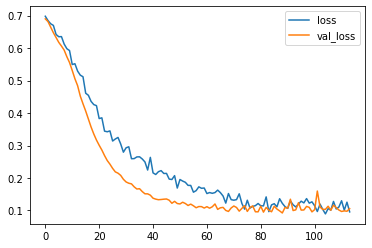

In [ ]:
model_loss.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
